### Sushanta Shrestha
### Project 7

## Part 1 - Linear Regression
# Section 1 - Load

In [8]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


# Section 2 - View
### To view the head and tail of the DataFrame, you can use the head() and tail() methods.

In [9]:
print(nyc.head())
print(nyc.tail())


     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9
3  189801         39.6      2.2
4  189901         36.4     -1.0
       Date  Temperature  Anomaly
119  201401         35.5     -1.9
120  201501         36.1     -1.3
121  201601         40.8      3.4
122  201701         42.8      5.4
123  201801         38.7      1.3


# Section 4 - Describe


In [10]:
print(nyc.describe())


                Date  Temperature     Anomaly
count     124.000000   124.000000  124.000000
mean   195651.000000    37.595161    0.195161
std      3593.976442     4.539848    4.539848
min    189501.000000    26.100000  -11.300000
25%    192576.000000    34.575000   -2.825000
50%    195651.000000    37.600000    0.200000
75%    198726.000000    40.600000    3.200000
max    201801.000000    47.600000   10.200000


# Section 5 - Calculate Line

In [11]:
from scipy import stats

linear_regression = stats.linregress(x=nyc['Date'], y=nyc['Temperature'])


# Section 6 - Predict

In [12]:
temp_2026 = linear_regression.slope * 2026 + linear_regression.intercept
print(temp_2026)


8.994113296616847


# Section 7 - Plot

(10.0, 70.0)

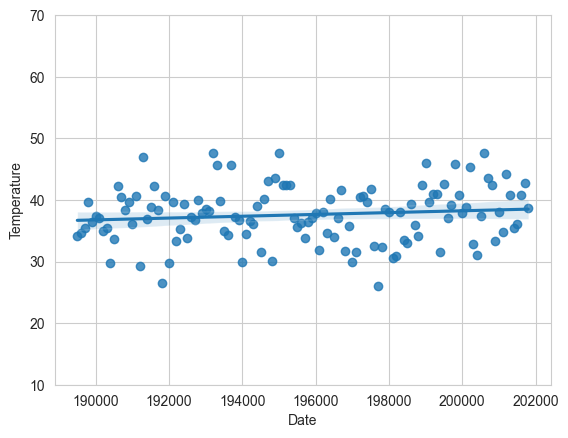

In [13]:
import seaborn as sns

# Set the style of the plot
sns.set_style('whitegrid')

# Create a scatter plot with a regression line
axes = sns.regplot(x=nyc['Date'], y=nyc['Temperature'])

# Set the y-axis limits
axes.set_ylim(10, 70)


# Part 2: Machine Learning 

In [14]:
# Import the pandas library
import pandas as pd

# Read the CSV file into a pandas DataFrame
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

# Rename the columns of the DataFrame
nyc.columns = ['Date', 'Temperature', 'Anomaly']

# Convert the 'Date' column to a year by performing integer division by 100
nyc.Date = nyc.Date.floordiv(100)

# Display the first 3 rows of the DataFrame
nyc.head(3)



,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [16]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Use the train_test_split function to split the 'Date' and 'Temperature' data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    nyc['Date'].values.reshape(-1, 1), nyc['Temperature'].values,
    random_state=11)

# It should have 93 rows and 1 column, indicating a 75% split for training data
print(X_train.shape)  # Outputs: (93, 1)

# It should have 31 rows and 1 column, indicating a 25% split for test data
print(X_test.shape)  # Outputs: (31, 1)


(93, 1)
(31, 1)


# Training the Model

In [17]:
# Import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
linear_regression = LinearRegression()

# X_train is the feature matrix (in this case, the 'Date' column)
# y_train is the target vector (in this case, the 'Temperature' column)
linear_regression.fit(X=X_train, y=y_train)


LinearRegression()

In [18]:
# Get the coefficient of the linear regression model
# This is the slope of the line of best fit
print(linear_regression.coef_)  # Outputs: array([0.01939167])

# Get the intercept of the linear regression model
# This is the y-intercept of the line of best fit
print(linear_regression.intercept_)  # Outputs: -0.30779820252656265


[0.01939167]
-0.30779820252656975


# Testing the Model


In [19]:
# Use the linear regression model to predict the 'Temperature' for the test data
predicted = linear_regression.predict(X_test)

# The actual 'Temperature' values for the test data
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


# Predicting Future Tempratures and Estimating Past Temperatures

In [21]:
# Define a lambda function 'predict' that takes an input 'x' (year)
# and returns the predicted 'Temperature' for that year based on the linear regression model
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

# Use the 'predict' function to predict the 'Temperature' for the year 2019
print(predict(2019)) 

# Use the 'predict' function to predict the 'Temperature' for the year 1890
print(predict(1890))  


[38.84399018]
[36.34246432]


# Visualizing the Dataset with the Regression Line

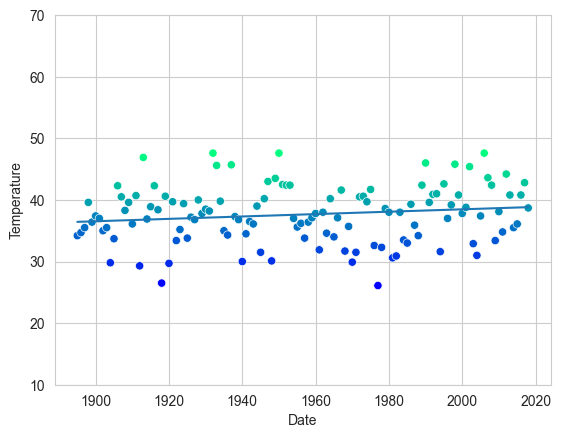

In [23]:
# Import the seaborn library for data visualization
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)

# Set the y-axis limits of the plot to 10 and 70
axes.set_ylim(10, 70)

# Import the numpy library for numerical operations
import numpy as np

# Create an array 'x' with the minimum and maximum values of 'Date'
x = np.array([min(nyc['Date'].values), max(nyc['Date'].values)])

# Use the 'predict' function to calculate the predicted 'Temperature' for each value in 'x'
y = predict(x)

# Import the matplotlib.pyplot library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Plot a line using 'x' and 'y'
line = plt.plot(x, y)



### Linear regression is a method for predicting a continuous outcome, while machine learning is a broad field that uses various algorithms, including linear regression, to make different types of predictions.